In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import pgeocode
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.ticker as mtick

In [3]:
%matplotlib inline
sns.set_theme()
plt.rcParams['figure.figsize'] = [14, 10]
pd.set_option('max_columns', None)

In [14]:
df = pd.read_csv("/home/jupyter/Data analyse/data/pricing.csv")

# Distribution du montant de la facturation

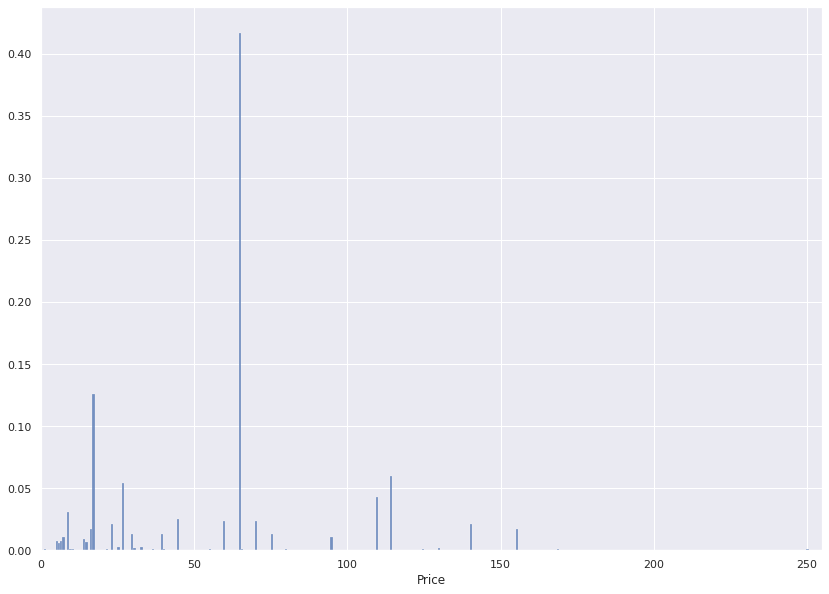

In [17]:
sns.histplot(x = 'Price',
             data = df,
             stat="probability")
plt.xlim(0, 255)
#plt.xlabel("Distance en km")
plt.ylabel(None)
#plt.ylim(0, 0.175)
plt.show()

In [22]:
extra_cost = pd.read_csv("/home/jupyter/Data analyse/data/extra_cost_2021.csv")
extra_cost.tail(5)

,Price,Date,Reason,Comment,Quote → Price,Quote → Vehicle Type,Retailer → Name,Carrier → Name,Store → Name
1048570,52.0,2021-10-12T13:07:32.248Z,DELTACOST_EXTEND_WAITING_WAREHOUSE,NaN,0.0,VEHICLE_TYPE_VAN_SMALL,Leroy Merlin,MyTroopers,Gennevilliers
1048571,52.0,2021-10-12T13:07:32.248Z,DELTACOST_EXTEND_WAITING_WAREHOUSE,NaN,0.0,VEHICLE_TYPE_VAN_SMALL,Leroy Merlin,MyTroopers,Gennevilliers
1048572,52.0,2021-10-12T13:07:32.248Z,DELTACOST_EXTEND_WAITING_WAREHOUSE,NaN,0.0,VEHICLE_TYPE_VAN_SMALL,Leroy Merlin,MyTroopers,Gennevilliers
1048573,52.0,2021-10-12T13:07:32.248Z,DELTACOST_EXTEND_WAITING_WAREHOUSE,NaN,0.0,VEHICLE_TYPE_VAN_SMALL,Leroy Merlin,MyTroopers,Gennevilliers
1048574,52.0,2021-10-12T13:07:32.248Z,DELTACOST_EXTEND_WAITING_WAREHOUSE,NaN,0.0,VEHICLE_TYPE_VAN_SMALL,Leroy Merlin,MyTroopers,Gennevilliers


# Transporteurs concernés par les extra-cost

In [23]:
extra_cost["extracost"] = extra_cost["Price"]
extra_cost[extra_cost["extracost"] > 0]["extracost"] = extra_cost[extra_cost["extracost"] > 0]["extracost"] - extra_cost["Quote → Price"]
extra_cost[extra_cost["extracost"] > 0]["extracost"] = extra_cost[extra_cost["extracost"] < 0]["extracost"] + extra_cost["Quote → Price"]

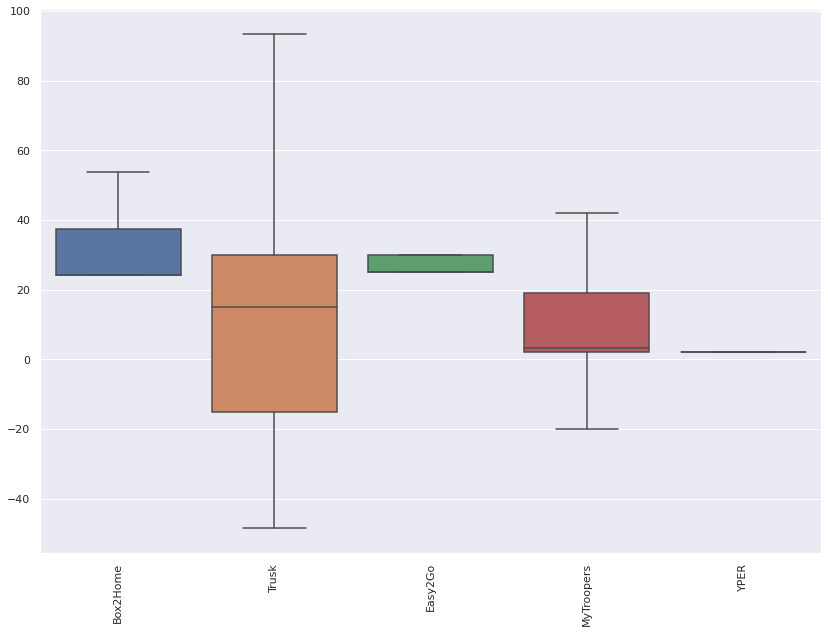

In [24]:
sns.boxplot(x="Carrier → Name", y="extracost",
            data = extra_cost,
            showfliers = False)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

# Magasins concernés par les extra-cost

In [25]:
extra_cost['magasin'] = extra_cost["Retailer → Name"] + " " +extra_cost["Store → Name"]

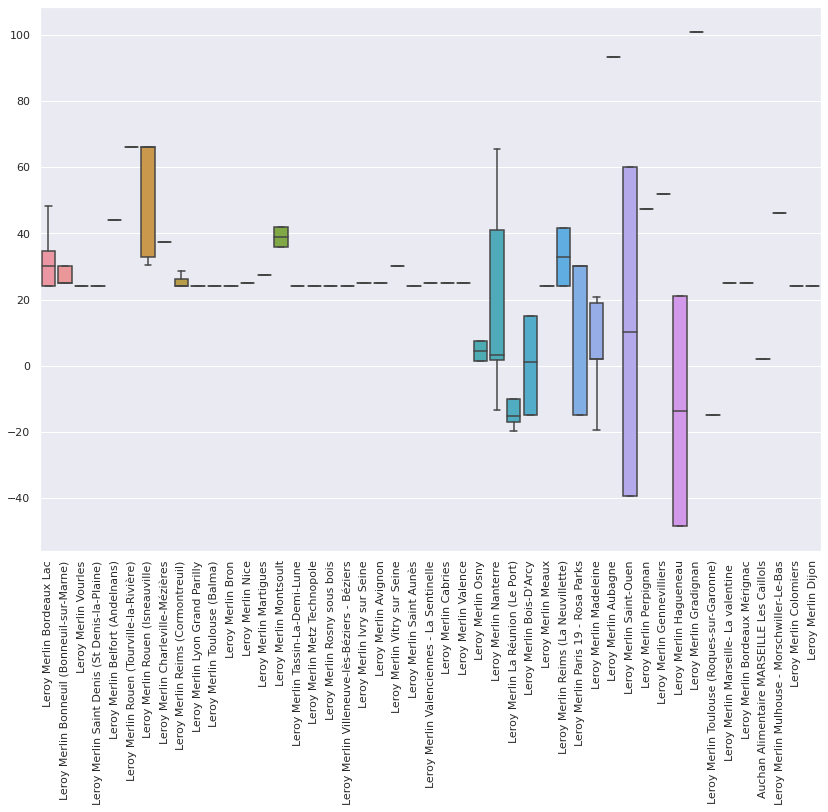

In [26]:
sns.boxplot(x="magasin", y="extracost",
            data = extra_cost,
            showfliers = False)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

# Part de devis erronés

In [30]:
pricing = pd.read_csv("/home/jupyter/Data analyse/data/pricing.csv")
pricing = pricing.drop_duplicates()

In [31]:
(len(pricing[pricing["Price"] != pricing["Quote → Price"]]) / len(pricing))*100

4.081632653061225

# Cout de livraison par transporteur

In [37]:
cout_carrier = pd.read_csv("/home/jupyter/Data analyse/data/cout_transporteur.csv")

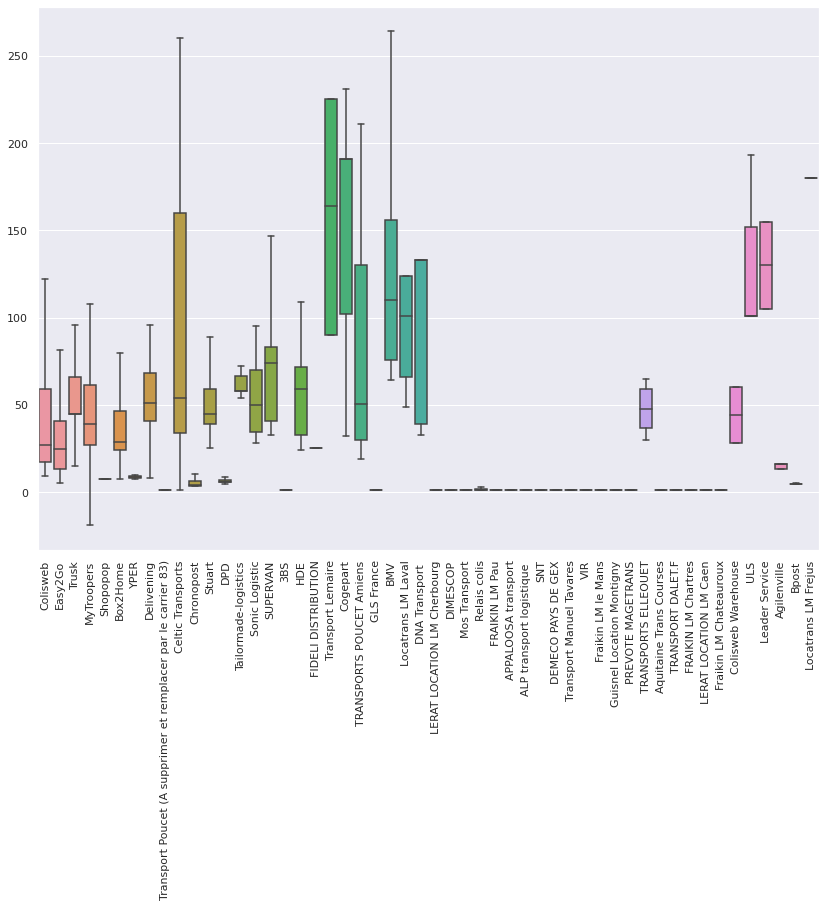

In [38]:
sns.boxplot(x="Carrier → Name", y="Price",
            data = cout_carrier,
            showfliers = False)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()